In [27]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt

In [8]:
X = np.arange(100, dtype=np.float32)
X = np.expand_dims(X, axis=1)
y = np.concatenate((np.zeros(50, dtype=np.long), np.ones(50, dtype=np.long)))

In [9]:
model = LogisticRegressionCV(n_jobs=-1).fit(X, y)

In [11]:
print(model.predict([[49]]))
print(model.predict([[50]]))
print(model.predict([[51]]))

[0]
[1]
[1]


In [18]:
probs = model.predict_proba(X)
preds = model.predict(X)

In [25]:
fpr, tpr, thresholds = roc_curve(y, probs[:, 1])
auc_score = roc_auc_score(y, probs[:, 1])

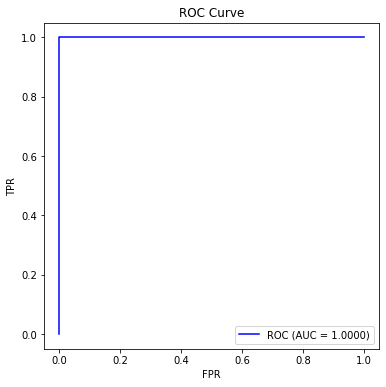

In [26]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [29]:
precision = precision_score(y, preds)
recall = recall_score(y, preds)
acc = accuracy_score(y, preds)

print('Detector ROC-AUC score: {:0.4f}, accuracy: {:.4f}, precision: {:.4f}, recall: {:.4f}'.format(
    auc_score, acc, precision, recall))

Detector ROC-AUC score: 1.0000, accuracy: 1.0000, precision: 1.0000, recall: 1.0000
